# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 02. Data types

In [3]:
path = r'C:\Users\Kozole\Desktop\CF Kurs\Excercise\6\World University Rankings'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwurData_3.csv'), index_col = False)

In [5]:
df.shape

(2200, 17)

In [6]:
df.head(5)

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,score_flag,continent,country_count
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012,Excellent,North America,573
1,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012,Excellent,North America,573
2,2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012,Excellent,North America,573
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Excellent,Europe,144
4,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012,Excellent,North America,573


In [7]:
# Dropping column Unnamed: 0

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.shape

(2200, 16)

In [9]:
df.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,score_flag,continent,country_count
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012,Excellent,North America,573
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012,Excellent,North America,573
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012,Excellent,North America,573
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Excellent,Europe,144
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012,Excellent,North America,573


In [10]:
# Check for missing values

df.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
patents                 0
score                   0
year                    0
score_flag              0
continent               0
country_count           0
dtype: int64

In [11]:
# No missing values to handle

In [12]:
# Checking for duplicated values

dups = df.duplicated()
dups.shape

(2200,)

In [13]:
# There are no duplicated values

In [14]:
# Filtering the DataFrame to remove categorical columns 

df_filtered = df[['world_rank', 'national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty',
'publications', 'influence', 'citations', 'patents', 'score']]

In [15]:
df_filtered.head(5)

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,1,1,7,9,1,1,1,1,5,100.00
1,2,2,9,17,3,12,4,4,1,91.67
2,3,3,17,11,5,4,2,2,15,89.50
3,4,1,10,24,4,16,16,11,50,86.17
4,5,4,2,29,7,37,22,22,18,85.21


In [16]:
# Defines the range of potential clusters and define k-means clusters in the range assigned 

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [17]:
# Create a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_filtered).score(df_filtered) for i in range(len(kmeans))]
score

C:\Users\Kozole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kozole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kozole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kozole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kozole\anaconda3\lib\site-packages\sklearn\

[-1052110928.506036,
 -414797415.6476718,
 -297894857.8958075,
 -254420865.39767915,
 -227831444.66374838,
 -210502124.83374262,
 -194476663.66288596,
 -183867951.55050203,
 -173588577.30814216]

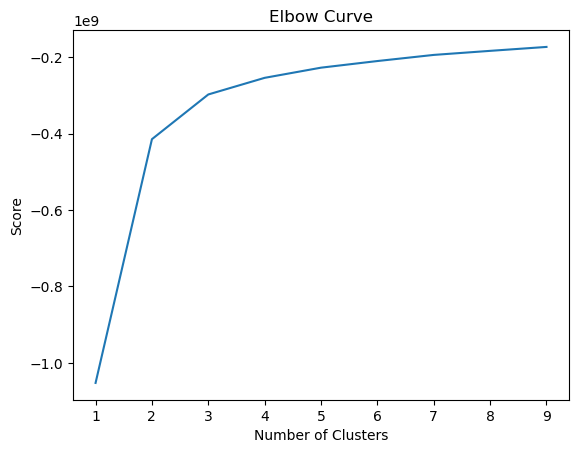

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# The number of clusters is considered to be the value of k at the elbow point or the point where the change in inertia begins to level off. In this case that number is 3.

In [19]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_filtered)

C:\Users\Kozole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [21]:
# Add a new column in dataframe to assing cluster number

df_filtered['clusters'] = kmeans.fit_predict(df_filtered)

C:\Users\Kozole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kozole\AppData\Local\Temp\ipykernel_34476\3031096737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['clusters'] = kmeans.fit_predict(df_filtered)


In [22]:
df_filtered.head(5)

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,clusters
0,1,1,7,9,1,1,1,1,5,100.00,1
1,2,2,9,17,3,12,4,4,1,91.67,1
2,3,3,17,11,5,4,2,2,15,89.50,1
3,4,1,10,24,4,16,16,11,50,86.17,1
4,5,4,2,29,7,37,22,22,18,85.21,1


In [23]:
df_filtered['clusters'].value_counts()

2    805
1    701
0    694
Name: clusters, dtype: int64

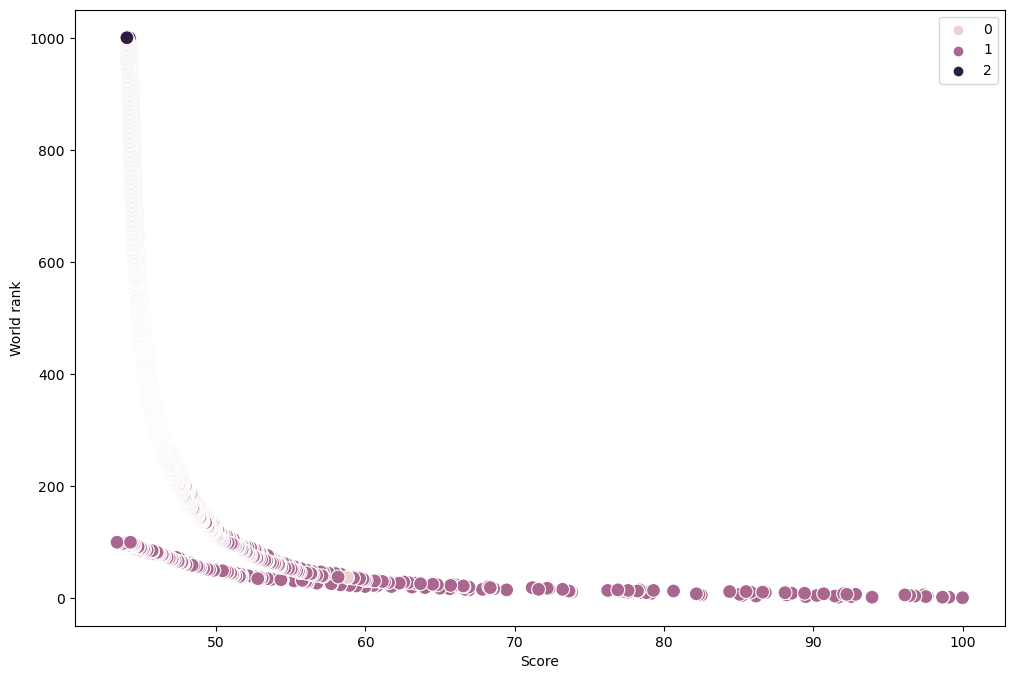

In [24]:
# Plot the clusters for the "score" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_filtered['score'], y=df_filtered['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) # Removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('World rank') # Label y-axis.
plt.show()

# We can see that cluster 1 is contained by faculties that are in the word rank of between 1 and 100

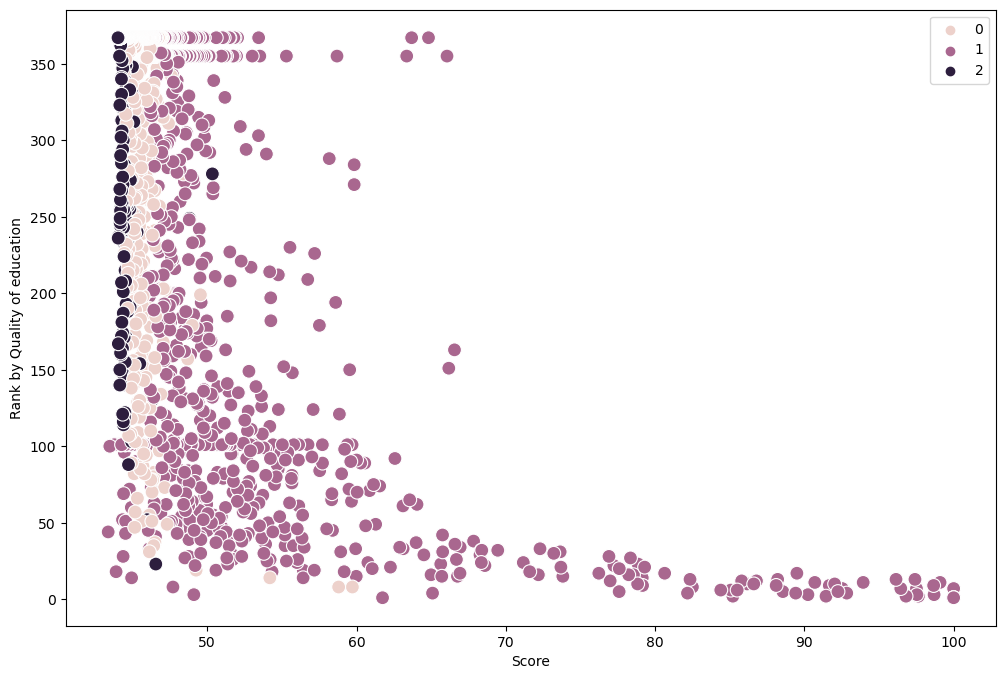

In [25]:
# Plot the clusters for the "score" and "quality_of_education" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_filtered['score'], y=df_filtered['quality_of_education'], hue=kmeans.labels_, s=100) 

ax.grid(False) # Removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Rank by Quality of education') # Label y-axis.
plt.show()

# We can easily notice that the faculties that have a score over 70 are in the rank of the first 50 by the Rank of the quality of education. The clusters are well defined and the clusters 0 and 2 populate the area with scores below 50.

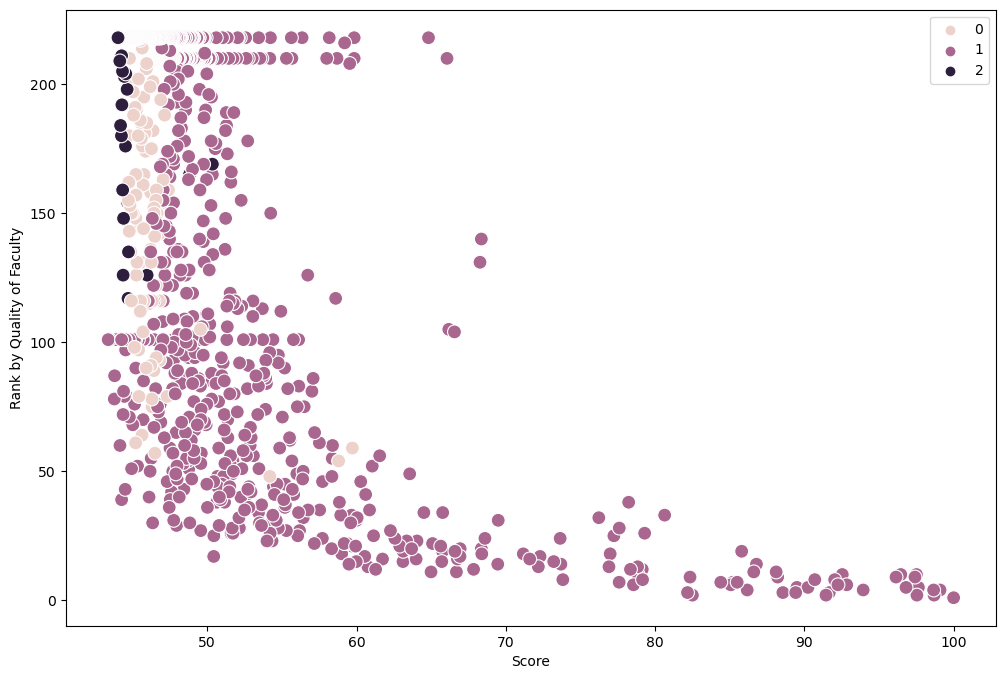

In [26]:
# Plot the clusters for the "score" and "quality_of_faculty" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_filtered['score'], y=df_filtered['quality_of_faculty'], hue=kmeans.labels_, s=100) 

ax.grid(False) # Removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Rank by Quality of Faculty') # Label y-axis.
plt.show()

# We can easily notice that the faculties that have a score over 70 are in the rank of the first 50 by the Rank of the quality of faculty. The clusters are well defined and the clusters 0 and 2 populate the area with scores below 50.

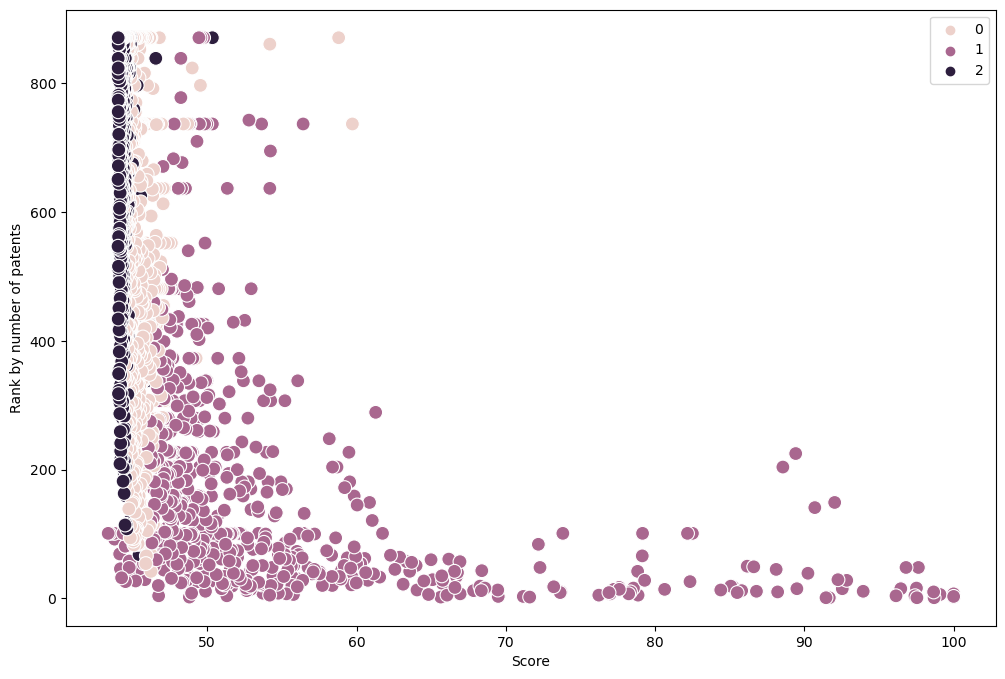

In [27]:
# Plot the clusters for the "score" and "patents" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_filtered['score'], y=df_filtered['patents'], hue=kmeans.labels_, s=100) 

ax.grid(False) # Removes the grid from the background.
plt.xlabel('Score') # Label x-axis.
plt.ylabel('Rank by number of patents') # Label y-axis.
plt.show()

# We can easily notice that most of the faculties that have a score over 60 are in the rank of the first 150 by the Rank by the number of patents. The clusters are well defined and the clusters 0 and 2 populate the area with scores below 50.

In [28]:
df_filtered.loc[df_filtered['clusters'] == 2, 'cluster'] = 'dark purple'
df_filtered.loc[df_filtered['clusters'] == 1, 'cluster'] = 'purple'
df_filtered.loc[df_filtered['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Kozole\AppData\Local\Temp\ipykernel_34476\3813006564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[df_filtered['clusters'] == 2, 'cluster'] = 'dark purple'


In [29]:
df_filtered.groupby('cluster').agg({'score':['mean', 'median'], 
                         'world_rank':['mean', 'median'], 
                         'quality_of_education':['mean', 'median'],
                          'quality_of_faculty':['mean', 'median'],
                         'patents':['mean', 'median']})

score          world_rank        quality_of_education         \
                  mean  median        mean median                 mean median   
cluster                                                                         
dark purple  44.422224  44.380  788.027329  799.0           343.927950  355.0   
pink         45.441066  45.215  434.000000  430.5           319.014409  355.0   
purple       54.009244  49.730  107.763195   89.0           152.586305  101.0   

            quality_of_faculty            patents         
                          mean median        mean median  
cluster                                                   
dark purple         213.089441  211.0  635.581366  697.0  
pink                205.291066  210.0  473.855908  481.0  
purple              113.473609  101.0  161.002853  101.0

# The dark purple cluster tends to have higher scores and world ranks compared to the other clusters.
# The pink cluster has a relatively lower world rank and lower quality of education compared to the other clusters.
# The purple cluster generally has lower scores, world ranks, and quality of education compared to the other clusters.


# By examining the mean and median values of different variables across clusters, we can identify which features contribute significantly to cluster differentiation. This insight can guide the selection of relevant features for further analysis and modeling.

In [32]:
#Exporting df as cwurData_5csv

df_filtered.to_csv(os.path.join(path, '02 Data','Prepared Data', 'cwurData_9.csv'))